<a href="https://colab.research.google.com/github/shubavarma/DeepLearning/blob/main/uShape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow
import tensorflow.keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
from keras.utils.vis_utils import plot_model

In [2]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DLdatasets/1.ushape.csv",header=None)

In [3]:
data.head()

,0,1,2
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    float64
 1   1       100 non-null    float64
 2   2       100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


No null values

In [5]:
data.shape

(100, 3)

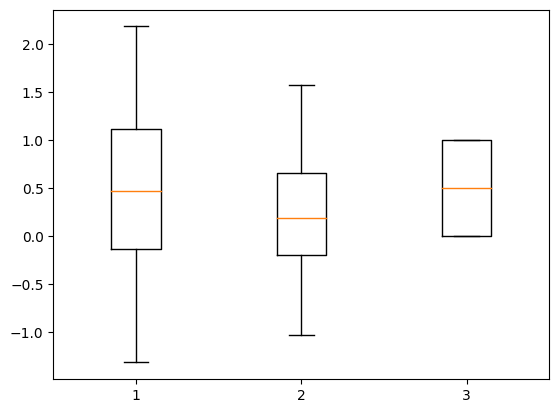

In [6]:
plt.boxplot(data)
plt.show()

No outliers

In [7]:
data[2].value_counts()

0.0    50
1.0    50
Name: 2, dtype: int64

Balanced data

In [8]:
x = data[[0,1]]
y = data[2]

In [9]:
y = y.astype(int)

Output needs to be int for comparision with predicted output

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=33)

In [11]:
x_train.shape,x_test.shape,len(y_train),len(y_test)

((80, 2), (20, 2), 80, 20)

In [12]:
std=StandardScaler()
x_train=std.fit_transform(x_train)
x_test=std.transform(x_test)

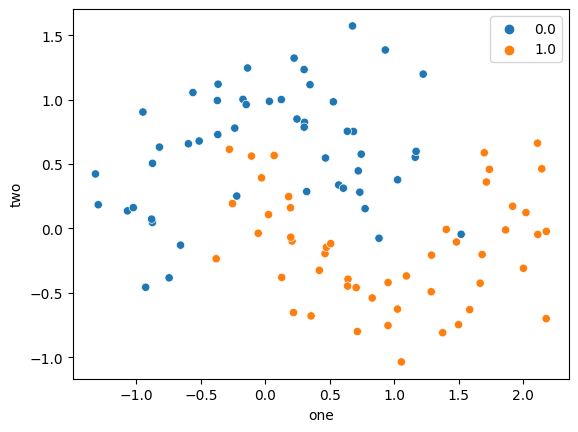

In [13]:
# code to visualize the data
data.columns = ["one","two","three"]
import seaborn as sns
sns.scatterplot(data=data, x="one",y="two",hue="three")
plt.legend()

In [14]:
model=Sequential()
model.add(Dense(10,activation="sigmoid",input_dim=2))
model.add(Dense(1,activation="sigmoid"))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


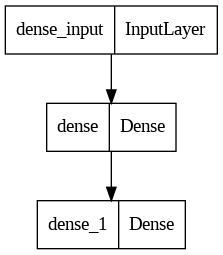

In [16]:
plot_model(model)

In [17]:
model.layers[0].get_weights()

[array([[ 0.38655418, -0.48544082,  0.0634135 ,  0.01550025,  0.25886124,
          0.12837422,  0.04626513, -0.37849185, -0.52955323,  0.3690843 ],
        [ 0.4674304 , -0.5633329 , -0.02278441, -0.14561349,  0.18540919,
          0.13614744,  0.62863404,  0.21306276, -0.63770574,  0.39806718]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)]

In [18]:
model.compile(optimizer="sgd",loss="binary_crossentropy",metrics=["accuracy"])

In [19]:
history = model.fit(x_train,y_train,batch_size=1,epochs=25,validation_split=0.2)

Epoch 1/25
64/64 [==============================] - 2s 17ms/step - loss: 0.6397 - accuracy: 0.7031 - val_loss: 0.6204 - val_accuracy: 0.7500
Epoch 2/25
64/64 [==============================] - 0s 8ms/step - loss: 0.6269 - accuracy: 0.7344 - val_loss: 0.6078 - val_accuracy: 0.7500
Epoch 3/25
64/64 [==============================] - 1s 10ms/step - loss: 0.6146 - accuracy: 0.7344 - val_loss: 0.5902 - val_accuracy: 0.7500
Epoch 4/25
64/64 [==============================] - 0s 7ms/step - loss: 0.6038 - accuracy: 0.7656 - val_loss: 0.5753 - val_accuracy: 0.7500
Epoch 5/25
64/64 [==============================] - 0s 7ms/step - loss: 0.5926 - accuracy: 0.7656 - val_loss: 0.5605 - val_accuracy: 0.8125
Epoch 6/25
64/64 [==============================] - 0s 7ms/step - loss: 0.5819 - accuracy: 0.7812 - val_loss: 0.5422 - val_accuracy: 0.8125
Epoch 7/25
64/64 [==============================] - 0s 6ms/step - loss: 0.5714 - accuracy: 0.8125 - val_loss: 0.5257 - val_accuracy: 0.8750
Epoch 8/25
64/64 [

In [20]:
predict = np.where(model.predict(x_test)>0.5,1,0)

1/1 [==============================] - 0s 245ms/step


In [21]:
accuracy_score(y_test,predict)

0.8

9600/9600 [==============================] - 15s 2ms/step


<Axes: >

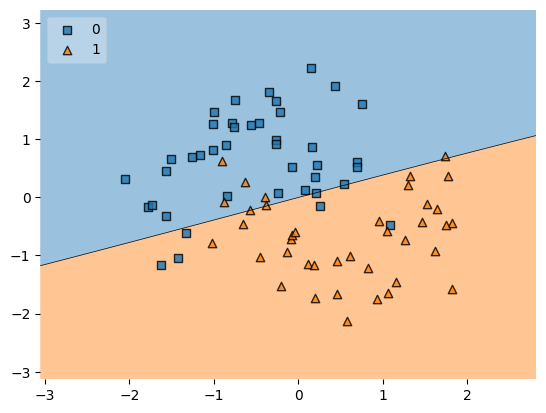

In [22]:
plot_decision_regions(x_train,y_train.values,clf=model,legend=2)

9600/9600 [==============================] - 14s 1ms/step


<Axes: >

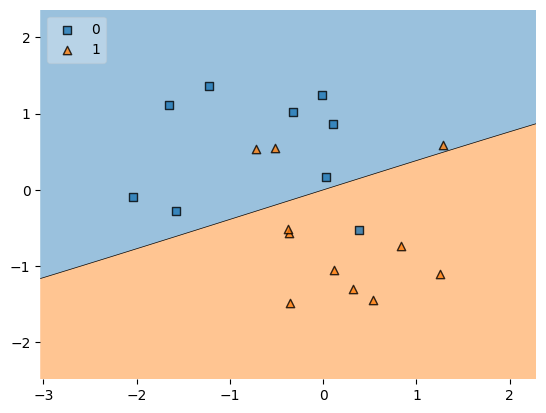

In [23]:
plot_decision_regions(x_test,y_test.values,clf=model,legend=2)